# Cards vs Cats the Numbers: Bluegrass Gridiron Superiority or Equals

In [15]:
import pandas as pd
import numpy as np
import csv
import sqlite3 as sql
import matplotlib.pyplot as plt


In [16]:
conn = sql.connect('cardscatsdata.db')
cardscatsdata = pd.read_csv('cards v cats the numbers.csv')
cardscatsdata.to_sql('cardscatsdata', conn, if_exists = 'replace')


In [17]:
# UofL Win Lost Season Totals 2014 - 2018
uofldata = pd.read_sql_query("""
    SELECT season, game_wins, game_losses
    FROM cardscatsdata
    WHERE team = 'UofL'
    """, conn)
uofldata


,season,game_wins,game_losses
0,2018,2,10
1,2017,8,5
2,2016,9,4
3,2015,8,5
4,2014,9,4


In [18]:
# UK Win Lost Season Totals 2014 - 2018
ukdata = pd.read_sql_query("""
    SELECT season, game_wins, game_losses 
    FROM cardscatsdata
    WHERE team = 'UK'
    """, conn)
ukdata


,season,game_wins,game_losses
0,2018,10,3
1,2017,7,6
2,2016,7,6
3,2015,5,7
4,2014,5,7


In [19]:
# Combined Win Lost Season Totals 2014 - 2018
combined_data = pd.DataFrame()
combined_data['Season'] = uofldata['season']
combined_data['UK wins'] = ukdata['game_wins']
combined_data['Uofl wins'] = uofldata['game_wins']
combined_data['Uk losses'] = ukdata['game_losses']
combined_data['Uofl losses'] = uofldata['game_losses']
combined_data['Uk losses'] = ukdata['game_losses']
combined_data['Uofl losses'] = uofldata['game_losses']
combined_data


,Season,UK wins,Uofl wins,Uk losses,Uofl losses
0,2018,10,2,3,10
1,2017,7,8,6,5
2,2016,7,9,6,4
3,2015,5,8,7,5
4,2014,5,9,7,4


In [20]:
# UofL Offensive Season Totals 2014 - 2018
uofldata = pd.read_sql_query("""
    SELECT season, offense_plays, offense_total_yards, total_passing_yards, 
    passing_attempts, passing_completions, passing_interceptions, passing_tds
    FROM cardscatsdata
    WHERE team = 'UofL'
    """, conn)
uofldata


,season,offense_plays,offense_total_yards,total_passing_yards,passing_attempts,passing_completions,passing_interceptions,passing_tds
0,2018,797,4231,2533,394,210,15,10
1,2017,959,7084,3898,464,277,10,29
2,2016,961,6925,3777,436,248,10,32
3,2015,900,5409,3186,409,227,15,21
4,2014,939,5131,3276,428,237,10,21


In [21]:
# UK Offensive Season Totals 2014 - 2018
ukdata = pd.read_sql_query("""
    SELECT season, offense_plays, offense_total_yards, total_passing_yards, 
    passing_attempts, passing_completions, passing_interceptions, passing_tds
    FROM cardscatsdata
    WHERE team = 'UK'
    """, conn)
ukdata


,season,offense_plays,offense_total_yards,total_passing_yards,passing_attempts,passing_completions,passing_interceptions,passing_tds
0,2018,832,4691,2099,296,194,10,14
1,2017,818,4548,2446,330,196,7,10
2,2016,872,5463,2419,312,170,12,17
3,2015,816,4464,2512,397,218,16,10
4,2014,849,4612,2774,405,228,11,14


In [22]:
# Combined Offensive Season Totals 2014 - 2018
combined_data = pd.DataFrame()
combined_data['Season'] = uofldata['season']
combined_data['Uk plays'] = ukdata['offense_plays']
combined_data['Uofl plays'] = uofldata['offense_plays']
combined_data['Uk yards'] = ukdata['offense_total_yards']
combined_data['Uofl yards'] = uofldata['offense_total_yards']
combined_data['Uk passing'] = ukdata['total_passing_yards']
combined_data['Uofl passing'] = uofldata['total_passing_yards']
combined_data['Uk attempts'] = ukdata['passing_attempts']
combined_data['Uofl attempts'] = uofldata['passing_attempts']
combined_data['Uk completions'] = ukdata['passing_completions']
combined_data['Uofl completions'] = uofldata['passing_completions']
combined_data['Uk interceptions'] = ukdata['passing_interceptions']
combined_data['Uofl interceptions'] = uofldata['passing_interceptions']
combined_data['Uk tds'] = ukdata['passing_tds']
combined_data['Uofl tds'] = uofldata['passing_tds']
combined_data


,Season,Uk plays,Uofl plays,Uk yards,Uofl yards,Uk passing,Uofl passing,Uk attempts,Uofl attempts,Uk completions,Uofl completions,Uk interceptions,Uofl interceptions,Uk tds,Uofl tds
0,2018,832,797,4691,4231,2099,2533,296,394,194,210,10,15,14,10
1,2017,818,959,4548,7084,2446,3898,330,464,196,277,7,10,10,29
2,2016,872,961,5463,6925,2419,3777,312,436,170,248,12,10,17,32
3,2015,816,900,4464,5409,2512,3186,397,409,218,227,16,15,10,21
4,2014,849,939,4612,5131,2774,3276,405,428,228,237,11,10,14,21


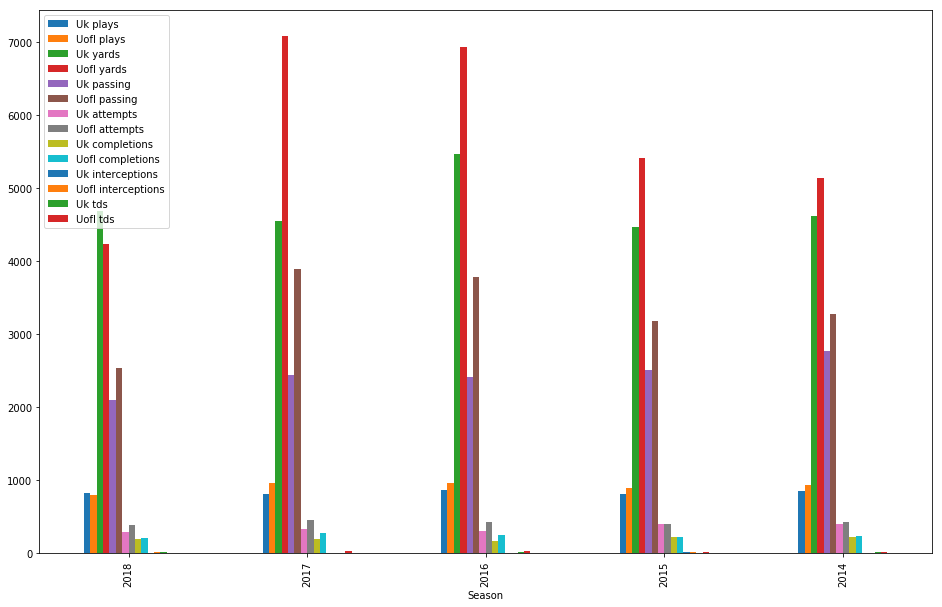

In [24]:
# Combined Offensive Season Totals Bar Graph Plot 2014 - 2018
combined_data.plot.bar(x='Season', figsize=(16, 10))
